# Background Information

## Logistic Regression

Logistic regression models the probability that Y falls into two discrete categories. 

![Logistic Regression](http://uc-r.github.io/public/images/analytics/logistic_regression/plot2-1.png)

### Simple Logistic Regression

The logistic function:
$$ \mathbb{P}(Y = 1 | X) = p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} $$

To fit this model, we use the *maximum likelihood* method to estimate $\beta_0, \beta_1$

$$ odds = \frac{p(X)}{1-p(X)} = e^{\beta_0 + \beta_1 X} $$

$$ logit = log(\frac{p(X)}{1-p(X)}) = \beta_0 + \beta_1 X $$

In a logistic regression model, increasing X by one unit changes the logit by $\beta_1$.  

The z-statistic plays the same role as the t-statistic in linear regression. A large value of the z-statistic indicates evidence against the null hypothesis. 

### Multiple Logistic Regression

The logistic function can be generalized as follows:
$$ log(\frac{p(X)}{1-p(X)}) = \beta_0 + \beta_1X_1 + ... + \beta_pX_p $$ 

$$ p(X) = \frac{e^{\beta_0 + \beta_1X_1 + ... + \beta_pX_p}}{1+e^{\beta_0 + \beta_1X_1 + ... + \beta_pX_p}} $$

As in linear regression, the results obtained using one predictor may be quite different from those obtained using multiple predictors, especially when there is correlation among the predictors. This is known as *confounding*. 

### Logistic Regression for >2 Response Classes

It is possible to do logistic regression with multiple classes, using methods like one v. all. However, another model, *discriminant analysis* is popular for multi-class classification

## Linear Discriminant Analysis (LDA)

Logistic regression directly models $ \mathbb{P}(Y=k|X=x) $, but in LDA we can model the distribution of the predictors X in each of the response classes of Y and then use Bayes' Theorem to estimate $ \mathbb{P}(Y=k|X=x) $. When the distributions are assumed to be normal, the model is very similar to logistic regression.

Why use this over logistic regression?
* When the classes are well-separated, the parameter estimates for logistic regression can be unstable
* If n is small and the distribution of X is approximately normal in each of the classes, the linear discriminant model is more stable than the logistic regression model
* LDA is more popular when we have multiple classes

### Simple LDA (One Predictor)

Let $f_k(x) = \mathbb{P}(X=x|Y=k)$ denote the density function of X for an observation that comes from the kth class. 

**Assumptions**

1. We assume that $f_k(x)$ is Gaussian, where $\mu_k$ is the mean and $\sigma_k^2$ is the variance for the kth class. 
2. We also assume $\sigma_1^2 = ... = \sigma_K^2$, which we'll denote as $\sigma^2$. 

$$ p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma} exp(-\frac{1}{2\sigma^2}(x-\mu_k)^2)}{\Sigma_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi}\sigma} exp(-\frac{1}{2\sigma^2}(x-\mu_l)^2)} $$

We use the following estimations:

$$ \hat{\mu}_k = \frac{1}{n_k} \sum_{i:y_i = k} x_i $$
$$ \hat{\sigma}^2 = \frac{1}{n - K} \sum_{k=1}^{K} \sum_{i:y_i = k} (x_i - \hat{\mu}_k)^2 $$
$$ \hat{\pi}_k = \frac{n_k}{n} $$

where n is the total number of training observations and $n_k$ is the number of training observations in the kth class. The estimate for $\mu_k$ is just the average of all the training observations from the kth class, while the estimate for $\sigma^2$ can be seen as the weighted average of the sample variances for each of the K classes. Sometimes we have knowledge of the class membership probabilities $\pi_k$, but if we don't, we estimate it using the proportion of the training observations that belong to the kth class. 

The LDA classifier assigns an observation $X = x$ to the class for which the discriminant function:

$$ \hat{\delta}_k(x) = x \cdot \frac{\hat{\mu}_k}{\hat{\sigma}^2} - \frac{\hat{\mu}_k^2}{2\hat{\sigma}^2} + log(\hat{\pi}_k) $$

is largest. 

### LDA for p > 1

**Assumptions**
* $X = (X_1, ..., X_p)$ is drawn from a multivariate Gaussian distribution such that $X \sim N(\mu, \Sigma) $
* The distribution has a common covariance matrix

The discriminant function is as follows:

$$ \delta_k(x) = x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu^T_k\Sigma^{-1}\mu_k + log(\pi_k) $$

In general, the Bayes classifier will try to minimize overall error, irrespective of which class the errors came from. If you have unbalanced classes, it's possible to have a very low sensitivity. However, it's possible to adjust for this

In the default example, we would assign an observation to the Default class if $ \mathbb{P}(default|X=x) > 0.5 $, but we can lower the threshold. 

The ROC curve is a popular graph to display the two types of error (specificity, sensitivity) for all possible thresholds. The overall performance of the classifier is given by the AUC, area under the curve. An ideal AUC is 1.0. 

![ROC Curve](https://www.medcalc.org/manual/_help/images/roc_intro3.png)

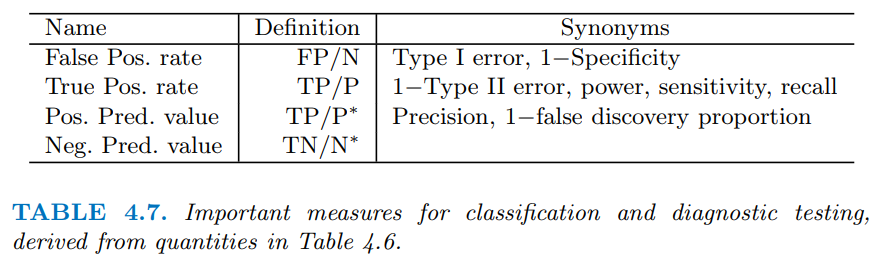

### Quadratic Discriminant Analysis

QDA drops LDA's assumption that the classes have a common covariance matrix. Thus it assumes that an observation for the kth class is of the form $X \sim N(\mu_k, \Sigma_k)$. 

Why would we prefer QDA vs LDA? LDA is much less flexible than QDA, and thus has lower variance. But if LDA's assumption that the K classes share a common covariance matrix is very off, then LDA can suffer from high bias. 

Generally, LDA tends to be a better choice if there are relatively few training observations. QDA is recommended if the training set is very large, so that the variance of the classifer is less of a concern, or if it's known that the assumption of a common covariance matrix is very wrong. 

## Comparing Classification Methods

Logistic regression and LDA are closely related, as they both produce linear decision boundaries. LDA can provide some improvements over logistic regression if its assumption that the observations are drawn from a Gaussian distribution with a common covariance matrix is closer to the truth. Logistic regression can outperform LDA if those assumptions are off. 

The KNN classifier will perform better than logistic regression and LDA if the decision boundary is highly non-linear. However, KNN can't tell us what predictors are important. 

QDA serves as a compromise between the non-parametric KNN and the linear LDA and logistic regression methods. With a limited number of training observations, QDA may perform better than KNN because it makes some assumptions about the form of the decision boundary. 

# Labs

## Logistic Regression with Stock Market Data

The `Smarket` data set contains percentage returns for the S&P 500 stock index over 1250 days from the beginning of 2001 until the end of 2005. For each date, we have the percentage returns for each of the five previous trading days, `Lag1` through `Lag5`. We have also recorded `Volume`, the number of shares traded on the previous day, in billions, `Today`, the percentage return on the date in question, and `Direction`, whether the market was `Up` or `Down` on this date

In [1]:
import pandas as pd

smarket = pd.read_csv('Data/smarket.csv')
smarket.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up

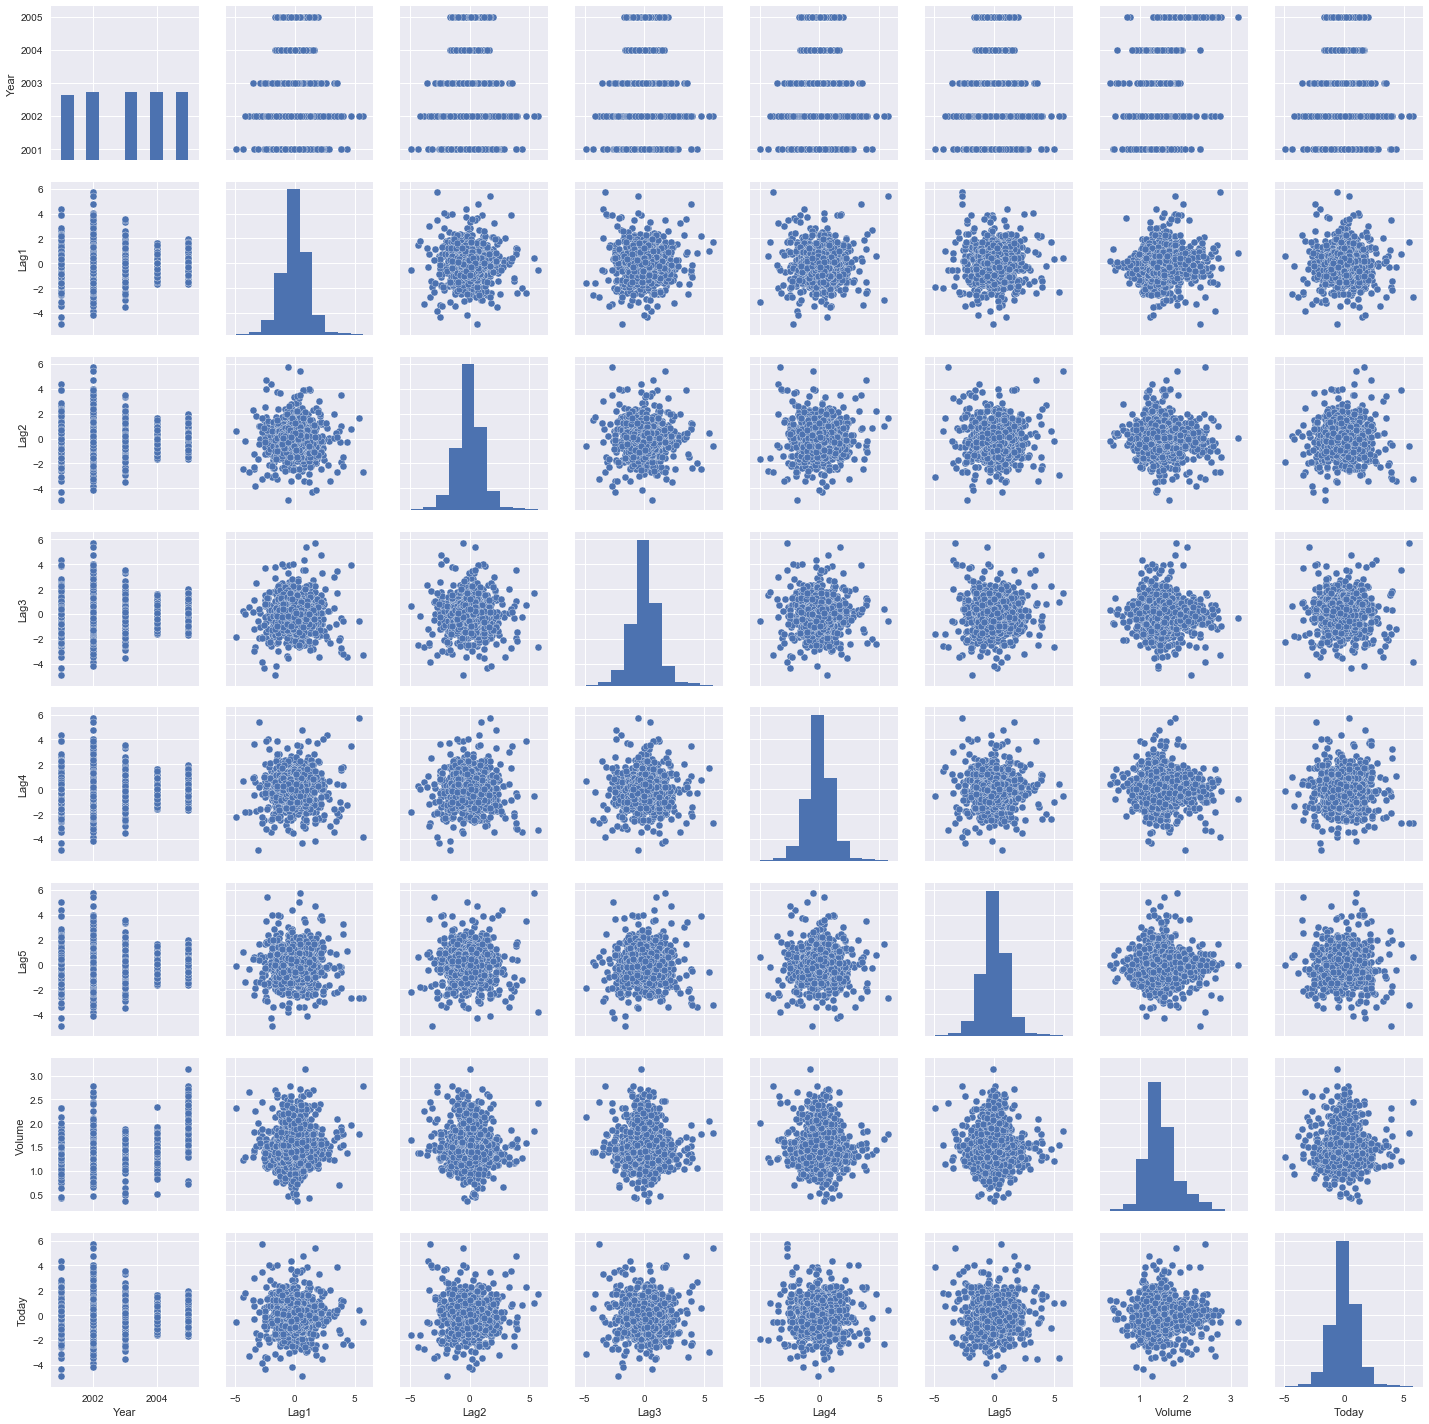

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# there is not much correlation between variables
sns.pairplot(smarket)
plt.show()

In [3]:
# Volume and year seem to be the only correlated variables
smarket.corr()

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000

In [13]:
# Let's try to predict Direction using Lag1-Lag5 and Volume with logistic regression
from sklearn.linear_model import LogisticRegression

X = smarket.iloc[:,1:7]
Y = smarket['Direction']
log_reg_clf = LogisticRegression().fit(X, Y)

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
log_reg_clf.classes_

array(['Down', 'Up'], dtype=object)

In [20]:
log_reg_clf.coef_

array([[-0.07279035, -0.04229102,  0.010958  ,  0.00921799,  0.01023031,
         0.12793931]])

In [21]:
log_reg_clf.intercept_

array([-0.11454962])

In [32]:
log_reg_clf.score(X, Y) # 52% accuracy with the training set

0.5248

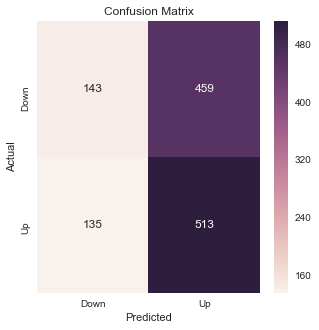

In [38]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(Y, log_reg_clf.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mat, annot=True, fmt='d',
            xticklabels=log_reg_clf.classes_, yticklabels=log_reg_clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# We can also use statsmodels
import statsmodels.formula.api as smf

smarket['Up'] = np.where(smarket['Direction'] == 'Up', 1, 0)
smarket.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction  Up
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up   1
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up   1
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down   0
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up   1
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up   1

In [25]:
# The smallest p-value is Lag1, but it's still not small enough to be statistically significant
results = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=smarket).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Wed, 27 Mar 2019   Pseudo R-squ.:                0.002074
Time:                        13:58:39   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [30]:
# Get the scores of the training set
results.predict()

array([0.50708413, 0.48146788, 0.48113883, ..., 0.5392683 , 0.52611829,
       0.51791656])

In [46]:
# Now let's split our data into training and test sets

X_train = X[smarket['Year'] < 2005]
X_test = X[smarket['Year'] == 2005]
Y_train = Y[smarket['Year'] < 2005]
Y_test = Y[smarket['Year'] == 2005]

In [42]:
X_train.shape

(998, 6)

In [44]:
X_test.shape

(252, 6)

In [49]:
log_reg_clf = LogisticRegression(solver='lbfgs').fit(X_train, Y_train)

In [50]:
# The test score is less than 0.5, worse than random guessing
log_reg_clf.score(X_test, Y_test)

0.48412698412698413

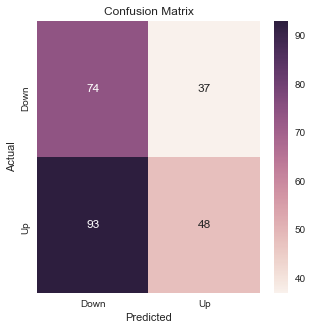

In [53]:
confusion_mat = confusion_matrix(Y_test, log_reg_clf.predict(X_test))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mat, annot=True, fmt='d',
            xticklabels=log_reg_clf.classes_, yticklabels=log_reg_clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# Let's try this again by only using Lag1 and Lag2, since the other variables don't seem to help
# Removing the extra variables improved the score to 0.56

X_train = X_train.loc[:, ['Lag1', 'Lag2']]
X_test = X_test.loc[:, ['Lag1', 'Lag2']]
log_reg_clf = LogisticRegression(solver='lbfgs').fit(X_train, Y_train)
log_reg_clf.score(X_test, Y_test)

0.5595238095238095

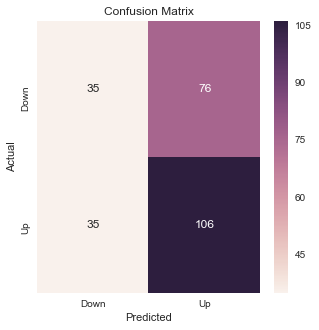

In [60]:
# The model has 58% accuracy when it predicts 'Up' and 50% accuracy when it predicts 'Down'
# Thus, a good strategy would be to only trade on days where it's predicted 'Up'

confusion_mat = confusion_matrix(Y_test, log_reg_clf.predict(X_test))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mat, annot=True, fmt='d',
            xticklabels=log_reg_clf.classes_, yticklabels=log_reg_clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## LDA with Stock Market Data

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [64]:
lda_clf = LDA().fit(X_train, Y_train)
lda_clf.score(X_test, Y_test)

0.5595238095238095

In [65]:
lda_clf.coef_

array([[-0.05544078, -0.0443452 ]])

In [66]:
lda_clf.intercept_

array([0.03221375])

In [69]:
# The means are the average of each predictor within each class
# The negative values for 'Up' means that when the last 2 days
# are in decline, it's more likely for the direction to be 'Up'
lda_clf.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [70]:
# The priors indicate that 49.2% of the training observationsi had 'Down'
lda_clf.priors_

array([0.49198397, 0.50801603])

In [71]:
lda_clf.classes_

array(['Down', 'Up'], dtype='<U4')

## QDA with Stock Market Data

In [72]:
# This one has the best performance so far
qda_clf = QDA().fit(X_train, Y_train)
qda_clf.score(X_test, Y_test)

0.5992063492063492

## KNN with Stock Market Data

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.5

In [76]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.5317460317460317

In [78]:
# k = 3 gives us the best results, but QDA is still the best
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.5158730158730159

## KNN with Caravan Insurance Data

The `caravan` data set contains 85 predictors that measure demographic characteristics for 5,822 individuals. The response variable is `Purchase`, which indicates whether or not an individual purchases Caravan insurance. In this data set, only 6% of people purchased the insurance

In [79]:
caravan = pd.read_csv('Data/caravan.csv')
caravan.head()

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0       33         1        3         2         8       0       5       1   
1       37         1        2         2         8       1       4       1   
2       37         1        2         2         8       0       4       2   
3        9         1        3         3         3       2       3       2   
4       40         1        4         2        10       1       4       1   

   MGODGE  MRELGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       3       7  ...         0        0        0       1        0         0   
1       4       6  ...         0        0        0       1        0         0   
2       4       3  ...         0        0        0       1        0         0   
3       4       5  ...         0        0        0       1        0         0   
4       4       7  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  Purchase  
0       0        0         0        No  
1       0        0         0        No  
2       0        0         0        No  
3       0        0         0        No  
4       0        0         0        No  

[5 rows x 86 columns]

In [83]:
from sklearn.preprocessing import StandardScaler

# KNN is sensitive to the scale of variables so we standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(caravan.drop(['Purchase'], axis=1))

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [90]:
scaled_df = pd.DataFrame(scaled_data)

In [92]:
scaled_df['Purchase'] = caravan['Purchase']

In [93]:
scaled_df.columns = caravan.columns

In [94]:
scaled_df.head()

MOSTYPE  MAANTHUI   MGEMOMV  MGEMLEEF  MOSHOOFD    MGODRK    MGODPR  \
0  0.680906  -0.27258  0.406697 -1.216964  0.779405 -0.694311  0.217444   
1  0.992297  -0.27258 -0.859500 -1.216964  0.779405  0.302552 -0.365410   
2  0.992297  -0.27258 -0.859500 -1.216964  0.779405 -0.694311 -0.365410   
3 -1.187437  -0.27258  0.406697  0.010755 -0.970980  1.299414 -0.948264   
4  1.225840  -0.27258  1.672893 -1.216964  1.479559  0.302552 -0.365410   

     MGODOV    MGODGE    MRELGE  ...  APERSONG   AGEZONG  AWAOREG    ABRAND  \
0 -0.068711 -0.161816  0.427670  ... -0.073165 -0.081055 -0.05992  0.764971   
1 -0.068711  0.464159 -0.096077  ... -0.073165 -0.081055 -0.05992  0.764971   
2  0.914172  0.464159 -1.667319  ... -0.073165 -0.081055 -0.05992  0.764971   
3  0.914172  0.464159 -0.619824  ... -0.073165 -0.081055 -0.05992  0.764971   
4 -0.068711  0.464159  0.427670  ... -0.073165 -0.081055 -0.05992  0.764971   

    AZEILPL  APLEZIER   AFIETS   AINBOED  ABYSTAND  Purchase  
0 -0.022706  -0.07365 -0.15062 -0.087348 -0.118816        No  
1 -0.022706  -0.07365 -0.15062 -0.087348 -0.118816        No  
2 -0.022706  -0.07365 -0.15062 -0.087348 -0.118816        No  
3 -0.022706  -0.07365 -0.15062 -0.087348 -0.118816        No  
4 -0.022706  -0.07365 -0.15062 -0.087348 -0.118816        No  

[5 rows x 86 columns]

In [112]:
X_test = scaled_df.iloc[0:1000,:85]
Y_test = scaled_df['Purchase'][0:1000]
X_train = scaled_df.iloc[1000:, :85]
Y_train = scaled_df['Purchase'][1000:]

In [125]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.882

In [116]:
knn.classes_

array(['No', 'Yes'], dtype=object)

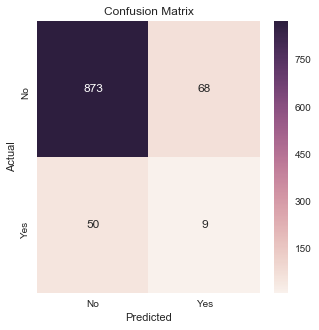

In [119]:
confusion_mat = confusion_matrix(Y_test, knn.predict(X_test))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mat, annot=True, fmt='d',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [126]:
from sklearn.metrics import classification_report

# Let's say we only care about what proportion of users we identify
# as going to buy insurance actually buy insurance
# Then we would prioritize the "Precision" metric

print(classification_report(Y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

          No       0.95      0.93      0.94       941
         Yes       0.12      0.15      0.13        59

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.53      0.54      0.53      1000
weighted avg       0.90      0.88      0.89      1000



In [127]:
# Let's try different values of k
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.926

In [128]:
# The precision went up substantially for k = 3
print(classification_report(Y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

          No       0.94      0.98      0.96       941
         Yes       0.20      0.08      0.12        59

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.57      0.53      0.54      1000
weighted avg       0.90      0.93      0.91      1000



In [129]:
# k = 5 also got better
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
print(classification_report(Y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

          No       0.94      0.99      0.97       941
         Yes       0.27      0.07      0.11        59

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.61      0.53      0.54      1000
weighted avg       0.90      0.93      0.92      1000



# Conceptual Questions

1. Let's examine the differences between LDA and QDA
  1. If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?
  2. If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?
  3. In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged?
  4. True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer
2. Suppose we collect data for a group of students in a statistics class with variables $X_1 = $ hours studied, $X_2 = $ undergrad GPA, and $Y = $ receive an A. We fit a logistic regression and produce the following estimated coefficients: $\beta_0 = -6, \beta_1 = 0.05, \beta_2 = 1$
  1. Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class
  2. How many hours would the student above need to study to have a 50% chance of getting an A in the class?
3. Suppose that we wish to predict whether a given stock will issue a dividend this year based on X, last year's percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was $\bar{X} = 10$, while the mean for those who didn't was $\bar{X} = 0$. The variance of X for these two sets of companies was $\hat{\sigma}^2 = 36$. Finally, 80% of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was $X = 4$ last year
4. Suppose that we take a data set and divide into equally-sized training and test sets, and then try out different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use KNN with k = 1 and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? 
5. This problem has to do with odds
  1. On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?
  2. Suppose than an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?

1. 
  1. QDA may perform slighly better on the training set because it will over-fit to noise, but LDA should perform better on the test set
  2. QDA should perform better on both the training set and the test set
  3. QDA tends to perform better with large n as the model becomes less variant. I would expect the test accuracy of QDA to improve
  4. False, QDA may over-fit to the noise. 
  
2. 
  1. $$ p(X) = \frac{e^{\beta_0 + \beta_1X_1 + ... + \beta_pX_p}}{1+e^{\beta_0 + \beta_1X_1 + ... + \beta_pX_p}} $$
     $$ p(X_1 = 40, X_2 = 3.5) = \frac{e^{-6 + 0.05*40 + 3.5}}{1+e^{-6 + 0.05*40 + 3.5}} = 0.378 $$
  2. $$ 0.50 = \frac{e^{-6 + 0.05*h + 3.5}}{1+e^{-6 + 0.05*h + 3.5}} $$
     $$ \Rightarrow h = 50 $$
3. $$ p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma} exp(-\frac{1}{2\sigma^2}(x-\mu_k)^2)}{\Sigma_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi}\sigma} exp(-\frac{1}{2\sigma^2}(x-\mu_l)^2)} $$
     $$ p_1(X = 4) = \frac{0.80 * \frac{1}{6\sqrt{2\pi}} exp(-\frac{1}{2*36}(4-10)^2)}{(0.80 * \frac{1}{6\sqrt{2\pi}} exp(-\frac{1}{2*36}(4-10)^2)) + (0.20*\frac{1}{6\sqrt{2\pi}} exp(-\frac{1}{2*36}(4-0)^2))} $$
     $$ p_1(X = 4) = 0.75 $$

4. With k = 1 for KNN, it should have a training accuracy score of 100%, since it will always choose itself. Thus its test score is 36% so we should use logistic regression
5. 
  1. $$ odds = \frac{p(X)}{1-p(X)} $$
     $$ 0.37 = \frac{p(X)}{1-p(X)} $$
     $$ \Rightarrow p(X) = 0.27 $$
  2. $$ odds = \frac{0.16}{1-0.16} = 0.19 $$

# Applied Questions

## Weekly Data Set

This question should be answered using the `Weekly` data set, which is part of the ISLR package. This data is similar to the `Smarket` data, except that it contains 1089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

1. Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?
2. Use the full data set to perform a logistic regression with `Direction` as the response and the five lage variables plus `Volume` as predictors. Do any of the predictors appear statistically significant? If so, which ones?
3. Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression
4. Now fit the regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data
5. Repeat 4 using LDA
6. Repeat 4 using QDA
7. Repeat 4 using KNN with k = 1
8. Which of these methods appears to provide the best results?
9. Experiment wiht different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. 

In [130]:
weekly = pd.read_csv('Data/weekly.csv')
weekly.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

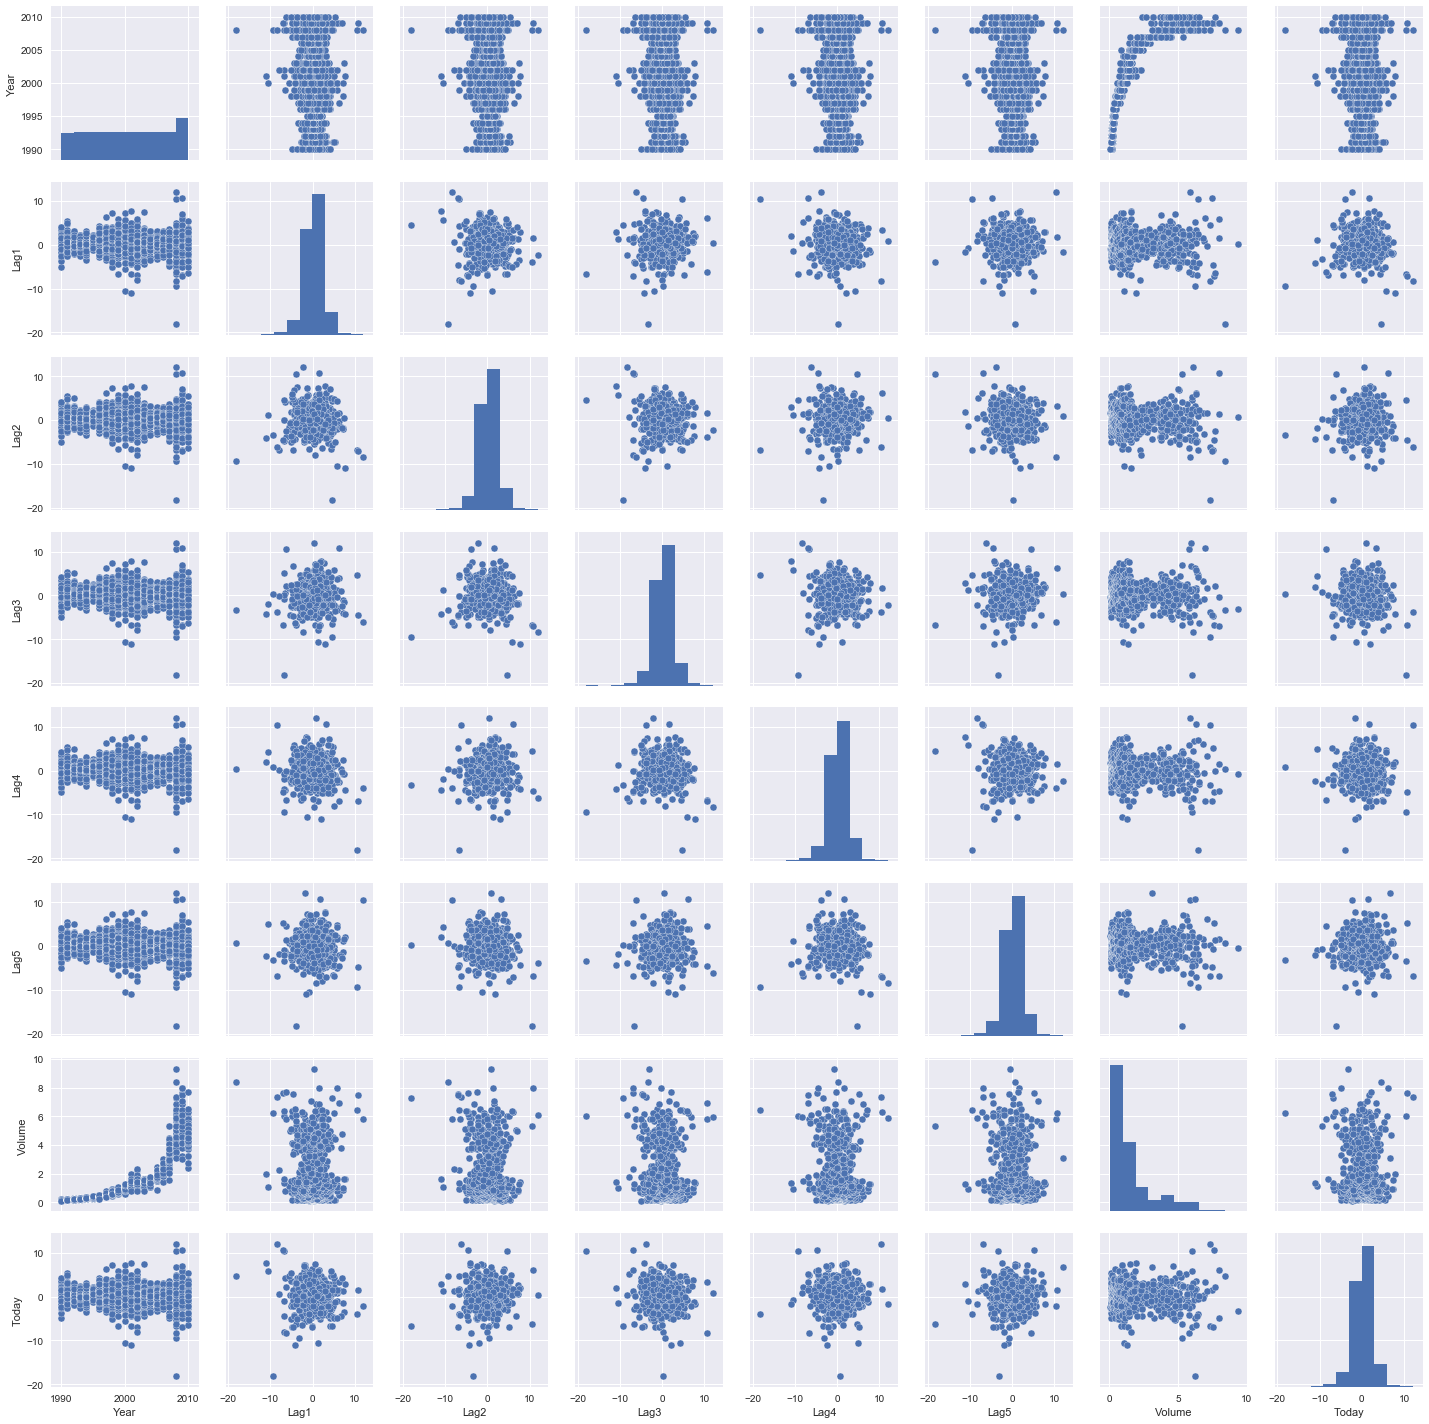

In [131]:
# There appears to be a strong correlation between year and volume
sns.pairplot(weekly)
plt.show()

In [132]:
# It's the only pair of variables with a high correlation
# The variables with the highest correlation with `Today` are lag1 and lag3
weekly.corr()

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000

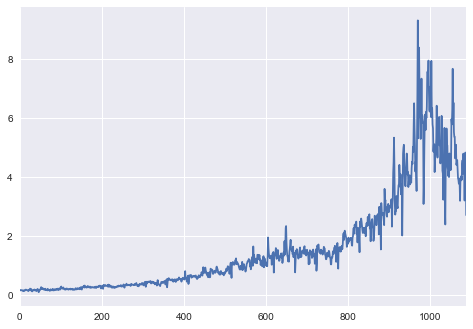

In [138]:
weekly['Volume'].plot()
plt.show()

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


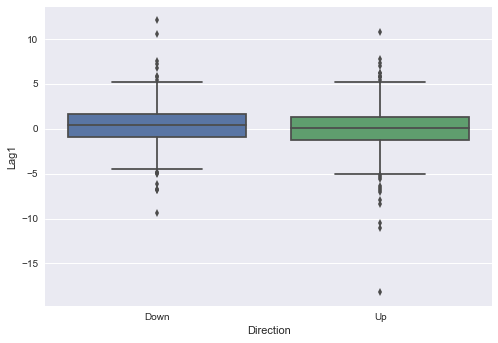

In [139]:
sns.boxplot('Direction', 'Lag1', data=weekly)
plt.show()

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


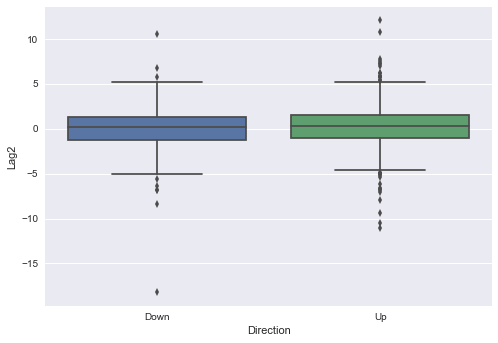

In [140]:
sns.boxplot('Direction', 'Lag2', data=weekly)
plt.show()

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


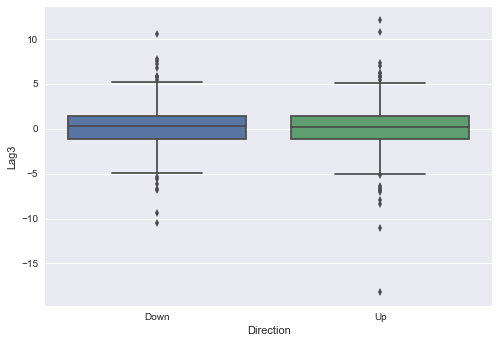

In [141]:
sns.boxplot('Direction', 'Lag3', data=weekly)
plt.show()

In [145]:
weekly['Direction_bool'] = np.where(weekly['Direction'] == 'Up', 1, 0)

In [146]:
weekly.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction  \
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down   
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down   
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up   
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up   
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up   

   Direction_bool  
0               0  
1               0  
2               1  
3               1  
4               1

In [150]:
# Interestingly, lag2 is statistically significant
results = smf.logit('Direction_bool ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Direction_bool   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 27 Mar 2019   Pseudo R-squ.:                0.006580
Time:                        17:17:12   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [161]:
results.pred_table()

array([[ 54., 430.],
       [ 48., 557.]])

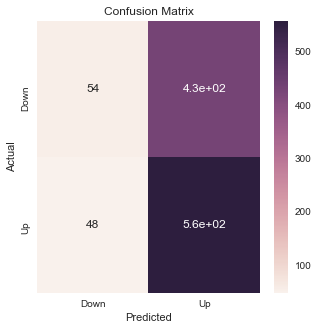

In [163]:
confusion_mat = results.pred_table()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mat, annot=True,
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [164]:
# Overall Accuracy
(557 + 54) / (54 + 430 + 48 + 557)

0.5610651974288338

In [165]:
# The recall for 'Up' was very high but the precision was not, which means it guessed 'Up' most of the time

predictions = np.where(results.predict(weekly) > .5, 1, 0)
print(classification_report(weekly['Direction_bool'], predictions))

              precision    recall  f1-score   support

           0       0.53      0.11      0.18       484
           1       0.56      0.92      0.70       605

   micro avg       0.56      0.56      0.56      1089
   macro avg       0.55      0.52      0.44      1089
weighted avg       0.55      0.56      0.47      1089



In [166]:
weekly.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction  \
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down   
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down   
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up   
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up   
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up   

   Direction_bool  
0               0  
1               0  
2               1  
3               1  
4               1

In [176]:
# Making our test and training sets and using only Lag2 as a predictor
weekly['ones'] = 1 # for the intercept

X_train = weekly[['ones', 'Lag2']].loc[(weekly['Year'] >= 1990) & (weekly['Year'] <= 2008)]
Y_train = weekly['Direction'].loc[(weekly['Year'] >= 1990) & (weekly['Year'] <= 2008)]

X_test = weekly[['ones', 'Lag2']].loc[(weekly['Year'] >= 2009)]
Y_test = weekly['Direction'].loc[(weekly['Year'] >= 2009)]

In [179]:
# Not bad, 0.625 accuracy
log_reg_clf = LogisticRegression(solver='lbfgs').fit(X_train, Y_train)
log_reg_clf.score(X_test, Y_test)

0.625

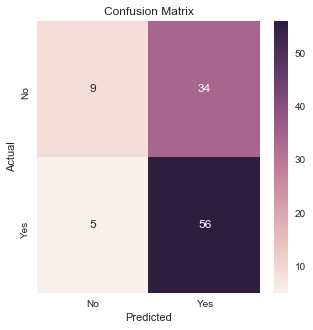

In [180]:
# It's not very good at predicting when the direction is 'down', it tends to guess 'up'
confusion_mat = confusion_matrix(Y_test, log_reg_clf.predict(X_test))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mat, annot=True, fmt='d',
            xticklabels=log_reg_clf.classes_, yticklabels=log_reg_clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [184]:
# LDA
# Same score as logistic regression
lda_clf = LDA().fit(X_train, Y_train)
lda_clf.score(X_test, Y_test)

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.625

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


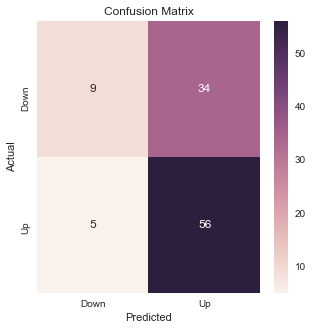

In [185]:
# same confusion matrix
clf = lda_clf
confusion_mat = confusion_matrix(Y_test, clf.predict(X_test))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mat, annot=True, fmt='d',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [181]:
# Let's try with QDA
# Not very good
qda_clf = QDA().fit(X_train, Y_train)
qda_clf.score(X_test,Y_test)

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:716: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:716: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:719: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


0.41346153846153844

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:716: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:716: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:719: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


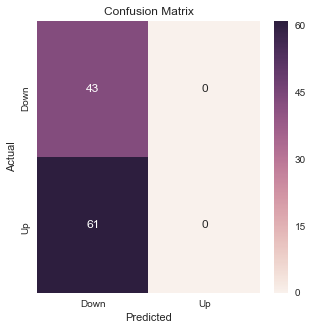

In [183]:
# interestingly, it never guessed 'Up'
clf = qda_clf
confusion_mat = confusion_matrix(Y_test, clf.predict(X_test))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mat, annot=True, fmt='d',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [186]:
# KNN with K = 1

knn_clf = KNeighborsClassifier(n_neighbors = 1)
knn_clf.fit(X_train, Y_train)
knn_clf.score(X_test, Y_test)

0.5

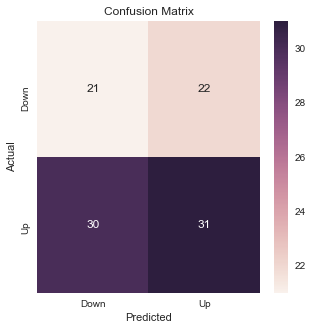

In [187]:
# it predicted down and up equally, no better than random guessing

clf = knn_clf
confusion_mat = confusion_matrix(Y_test, clf.predict(X_test))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mat, annot=True, fmt='d',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [188]:
# Logistic Regression and LDA seem to work the best

# Let's try some different things

# Better
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train, Y_train)
knn_clf.score(X_test, Y_test)

0.5384615384615384

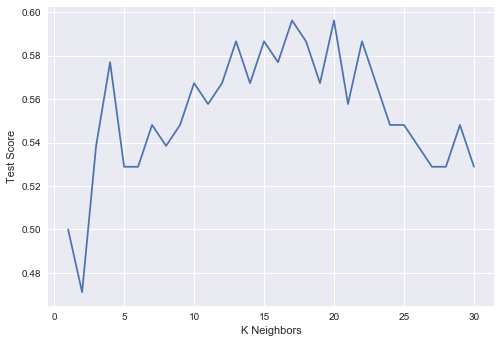

In [199]:
# k = 17 or 20 gives us the best score of 0.59 for knn but it's still not better
# than LDA or logistic regression
scores = []
for i in range(1, 31):
    knn_clf = KNeighborsClassifier(n_neighbors = i)
    knn_clf.fit(X_train, Y_train)
    scores.append(knn_clf.score(X_test, Y_test))
plt.plot(range(1,31), scores)
plt.xlabel('K Neighbors')
plt.ylabel('Test Score')
plt.show()

## Auto Data Set

In this problem, we'll predict whether a car gets high or low gas mileage

1. Create a binary variable `mpg01` that contains a 1 if `mpg` contains a value above the median and a 0 if `mpg` contains a value below the median. 
2. Explore the data graphically in order to investigate the association between `mpg1` and the other features. Which seem to be the most likely to be useful in predicting `mpg01`? 
3. Split the data into a training set and a test set
4. Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01`. What is the test error rate?
5. Repeat 4 with QDA
6. Repeat 4 with logistic regression
7. Repeat 4 with KNN, trying several values of K

In [207]:
auto = pd.read_csv('Data/auto.csv')
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [209]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  mpg01  
0       1  chevrolet chevelle malibu      0  
1       1          buick skylark 320      0  
2       1         plymouth satellite      0  
3       1              amc rebel sst      0  
4       1                ford torino      0

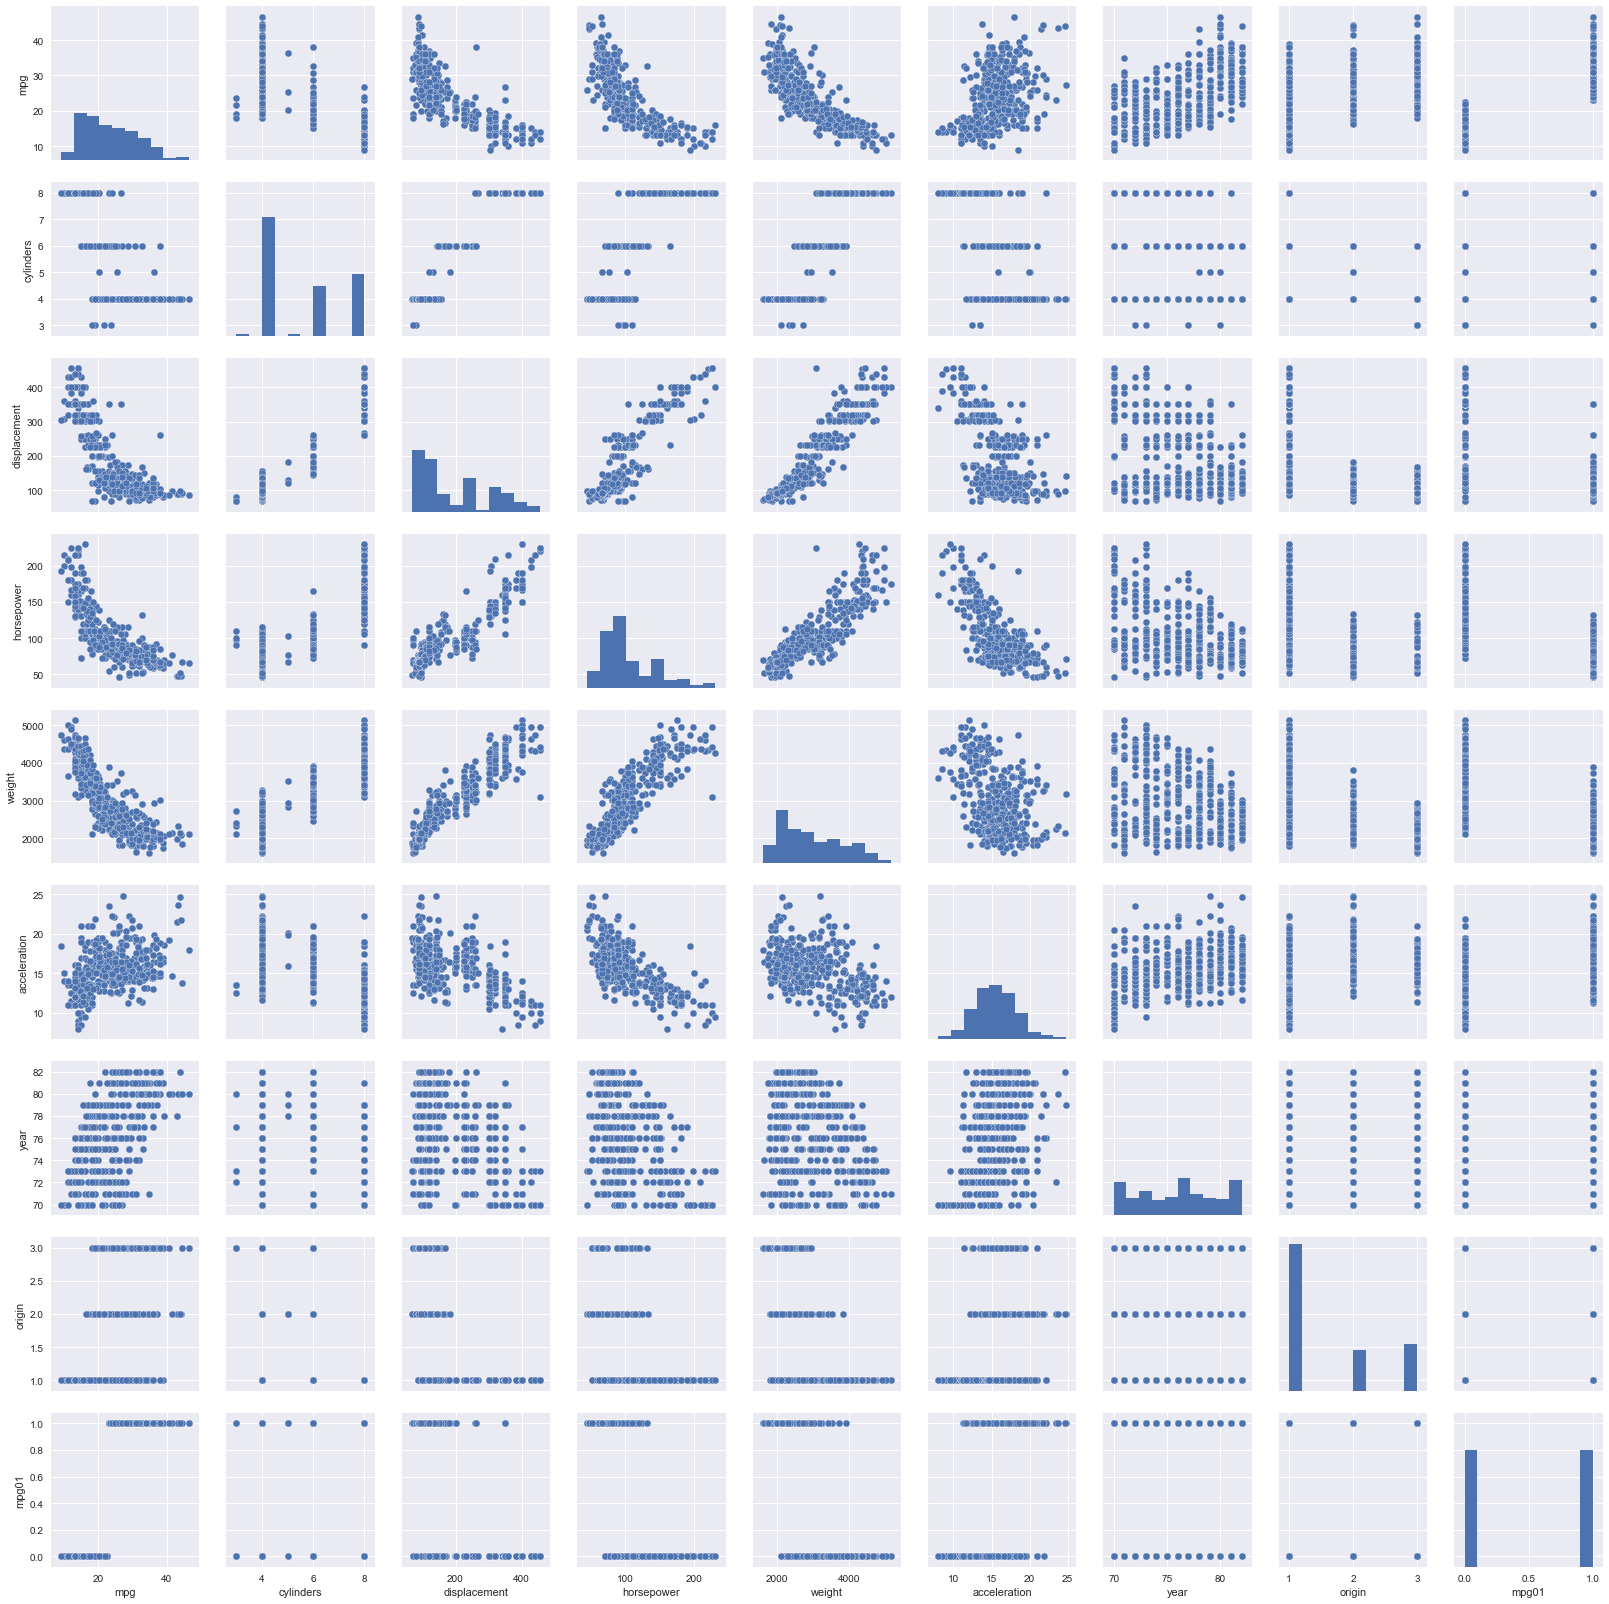

In [212]:
sns.pairplot(auto)
plt.show()

In [213]:
#  It looks like cylinders, displacement and weight have the biggest effect
# Year and origin also look useful
# However, cylinders, displacement, and horsepower, and weight are all strongly correlated
auto.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   
mpg01         0.836939  -0.759194     -0.753477   -0.667053 -0.757757   

              acceleration      year    origin     mpg01  
mpg               0.423329  0.580541  0.565209  0.836939  
cylinders        -0.504683 -0.345647 -0.568932 -0.759194  
displacement     -0.543800 -0.369855 -0.614535 -0.753477  
horsepower       -0.689196 -0.416361 -0.455171 -0.667053  
weight           -0.416839 -0.309120 -0.585005 -0.757757  
acceleration      1.000000  0.290316  0.212746  0.346822  
year              0.290316  1.000000  0.181528  0.429904  
origin            0.212746  0.181528  1.000000  0.513698  
mpg01             0.346822  0.429904  0.513698  1.000000

In [218]:
# Let's try at first just using displacement, year, and origin
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(auto[['displacement', 'year', 'origin']], auto['mpg01'], test_size=0.25)

In [219]:
# LDA
# Not bad
lda_clf = LDA().fit(X_train, Y_train)
lda_clf.score(X_test, Y_test)

0.9285714285714286

In [220]:
# QDA
# Better than LDA
qda_clf = QDA().fit(X_train, Y_train)
qda_clf.score(X_test, Y_test)

0.9387755102040817

In [221]:
# logistic regression
# Worse than LDA and QDA
log_reg_clf = LogisticRegression(solver='lbfgs').fit(X_train, Y_train)
log_reg_clf.score(X_test, Y_test)

0.9183673469387755

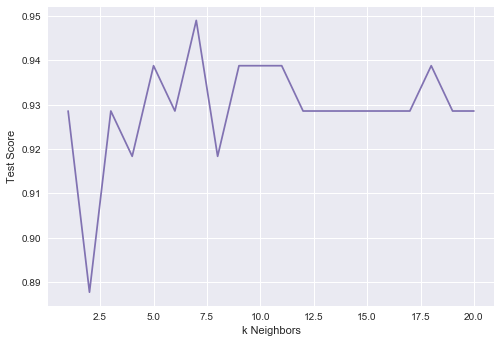

In [232]:
# KNN with multiple k values
# With k = 7, we got an impressive test score of almost 0.95
scores = {}
k_range = range(1, 21)
for i in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)
    scores[i] = knn_clf.score(X_test, Y_test)
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('k Neighbors')
plt.ylabel('Test Score')
plt.show()

In [234]:
# Let's try again with different predictors
# It's a little bit better when we add cylinders
X_train, X_test, Y_train, Y_test = train_test_split(auto[['cylinders', 'displacement', 'year', 'origin']], auto['mpg01'], test_size=0.25)
lda_clf = LDA().fit(X_train, Y_train)
lda_clf.score(X_test, Y_test)

0.9387755102040817

In [235]:
# Adding horsepower worsened the model
X_train, X_test, Y_train, Y_test = train_test_split(auto[['cylinders', 'horsepower', 'displacement', 'year', 'origin']], auto['mpg01'], test_size=0.25)
lda_clf = LDA().fit(X_train, Y_train)
lda_clf.score(X_test, Y_test)

0.8877551020408163

In [237]:
# adding weight also worsened the model
X_train, X_test, Y_train, Y_test = train_test_split(auto[['cylinders', 'weight', 'displacement', 'year', 'origin']], auto['mpg01'], test_size=0.25)
lda_clf = LDA().fit(X_train, Y_train)
lda_clf.score(X_test, Y_test)

0.8775510204081632

In [238]:
# adding weight and horsepower didn't help much either
# cylinders, displacement, year, and origin seems best
X_train, X_test, Y_train, Y_test = train_test_split(auto[['cylinders', 'weight', 'horsepower', 'displacement', 'year', 'origin']], auto['mpg01'], test_size=0.25)
lda_clf = LDA().fit(X_train, Y_train)
lda_clf.score(X_test, Y_test)

0.9081632653061225

In [239]:
# QDA performance worsened with this model
X_train, X_test, Y_train, Y_test = train_test_split(auto[['cylinders', 'displacement', 'year', 'origin']], auto['mpg01'], test_size=0.25)
qda_clf = QDA().fit(X_train, Y_train)
qda_clf.score(X_test, Y_test)

0.9183673469387755

In [240]:
# logistic regression got a little bit better
X_train, X_test, Y_train, Y_test = train_test_split(auto[['cylinders', 'displacement', 'year', 'origin']], auto['mpg01'], test_size=0.25)
log_reg_clf = LogisticRegression(solver='lbfgs').fit(X_train, Y_train)
log_reg_clf.score(X_test, Y_test)

0.9285714285714286

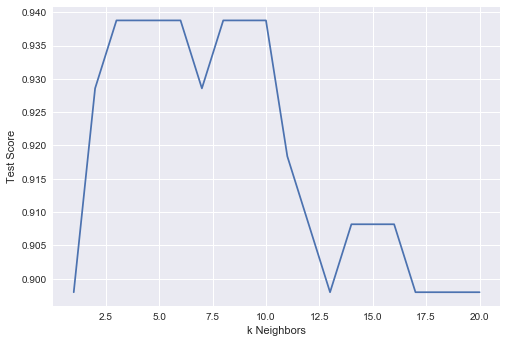

In [241]:
# KNN didn't perform as well with these predictors
scores = {}
k_range = range(1, 21)
for i in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)
    scores[i] = knn_clf.score(X_test, Y_test)
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('k Neighbors')
plt.ylabel('Test Score')
plt.show()

## Boston Data Set

Using the `Boston` data set, fit classification models to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, KNN models using various subsets of predictors

In [3]:
boston = pd.read_csv('Data/boston.csv')
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

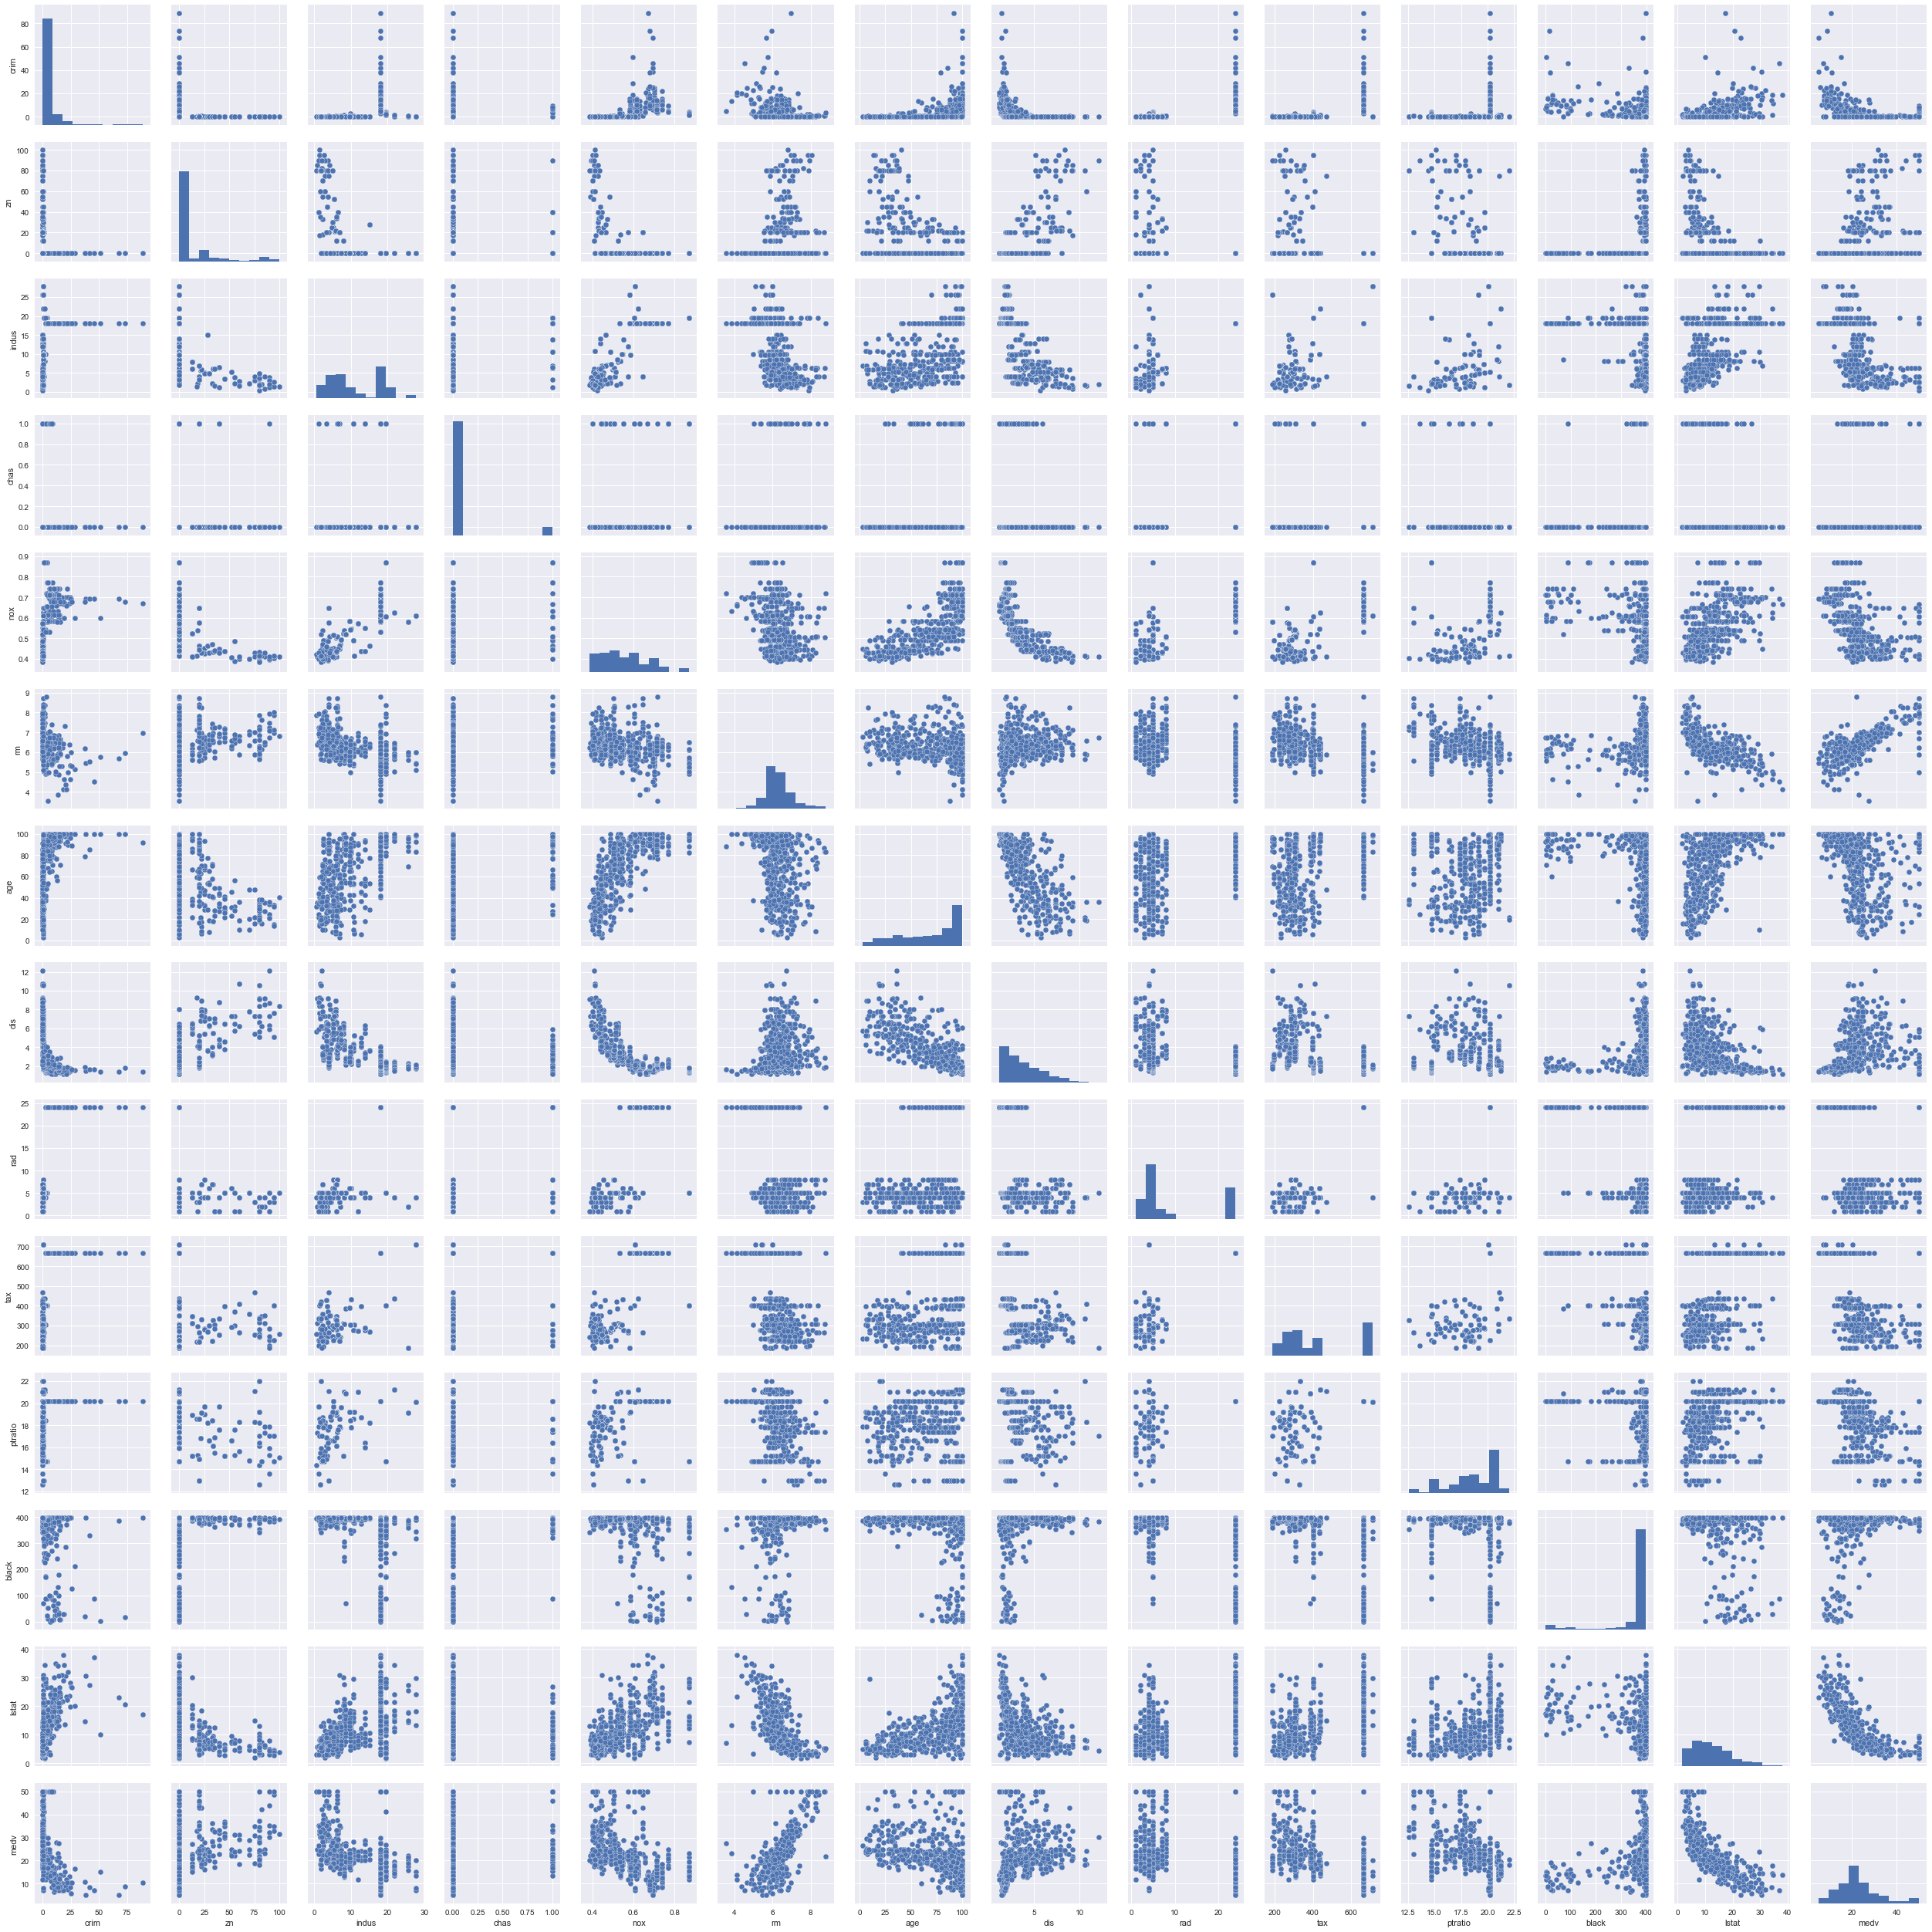

In [243]:
sns.pairplot(boston)
plt.show()

In [244]:
# The variables with the highest correlation are rad, tax, lstat, nox and indus
boston.corr()

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
medv    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              dis       rad       tax   ptratio     black     lstat      medv  
crim    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
age     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
black    0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
lstat   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
medv     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [4]:
# rad and tax are highly correlated so we mb should drop one

boston[['rad', 'tax', 'lstat', 'nox', 'indus']].corr()

rad       tax     lstat       nox     indus
rad    1.000000  0.910228  0.488676  0.611441  0.595129
tax    0.910228  1.000000  0.543993  0.668023  0.720760
lstat  0.488676  0.543993  1.000000  0.590879  0.603800
nox    0.611441  0.668023  0.590879  1.000000  0.763651
indus  0.595129  0.720760  0.603800  0.763651  1.000000

In [7]:
boston['crime01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  crime01  
0  396.90   4.98  24.0        0  
1  396.90   9.14  21.6        0  
2  392.83   4.03  34.7        0  
3  394.63   2.94  33.4        0  
4  396.90   5.33  36.2        0

In [9]:
predictors = ['rad', 'tax', 'lstat', 'nox', 'indus']
X_train, X_test, Y_train, Y_test = train_test_split(boston[predictors], boston['crime01'])

In [10]:
# Let's first try with this subset of variables

lr_clf = LogisticRegression(solver='lbfgs').fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.7952755905511811

In [11]:
lda_clf = LDA().fit(X_train, Y_train)
lda_clf.score(X_test, Y_test)

0.8188976377952756

In [12]:
qda_clf = QDA().fit(X_train, Y_train)
qda_clf.score(X_test, Y_test)

0.8188976377952756

In [22]:
# KNN performed the best here
knn_clf = KNeighborsClassifier(n_neighbors = 1).fit(X_train, Y_train)
knn_clf.score(X_test, Y_test)

0.9212598425196851

In [28]:
# Let's try parameter tuning logistic regression
# No difference

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
best_score = 0
best_c = 0

for c in Cs:
    lr_clf = LogisticRegression(solver='lbfgs', C=c).fit(X_train, Y_train)
    score = lr_clf.score(X_test, Y_test)
    if score > best_score:
        best_c = c
        best_score = score
        
print(best_score)
print(best_c)

0.84251968503937
100


In [40]:
# Let's make a function to easily compare algorithms 

# logistic regression and knn can have some parameter tuning

def tune_lr_clf(X_train, X_test, y_train, y_test, Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]):
    best_score = 0
    for c in Cs:
        lr_clf = LogisticRegression(solver='lbfgs', C=c).fit(X_train, y_train)
        score = lr_clf.score(X_test, Y_test)
        if score > best_score:
            best_clf = lr_clf
            best_score = score
    return best_clf, best_score

def tune_knn_clf(X_train, X_test, y_train, y_test, krange=range(1,21)):
    best_score = 0
    for k in krange:
        knn_clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        score = knn_clf.score(X_test, Y_test)
        if score > best_score:
            best_clf = knn_clf
            best_score = score
    return best_clf, best_score

def get_best_classifier(X, y, test_size = 0.25):
    best_score = 0
    scores_summary = {
        'lda': 0,
        'qda': 0,
        'logistic_regression': 0,
        'knn': 0
    }
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    lda_clf = LDA().fit(X_train, y_train)
    scores_summary['lda'] = lda_clf.score(X_test, y_test)
    if scores_summary['lda'] > best_score:
        best_score = scores_summary['lda']
        best_clf = lda_clf
        
    qda_clf = QDA().fit(X_train, y_train)
    scores_summary['qda'] = qda_clf.score(X_test, y_test)
    if scores_summary['qda'] > best_score:
        best_score = scores_summary['qda']
        best_clf = qda_clf
    
    lr_clf, scores_summary['logistic_regression'] = tune_lr_clf(X_train, X_test, y_train, y_test)
    if scores_summary['logistic_regression'] > best_score:
        best_score = scores_summary['logistic_regression']
        best_clf = lr_clf
        
    knn_clf, scores_summary['knn'] = tune_knn_clf(X_train, X_test, y_train, y_test)
    if scores_summary['knn'] > best_score:
        best_score = scores_summary['knn']
        best_clf = knn_clf
    print('The best score is: ', best_score)
    print('The best classifier: ', best_clf)
    print('Scores Summary: ', scores_summary)
    return best_clf, best_score, scores_summary

In [41]:
# LDA performed the best with this feature set
best_clf, best_score, scores_summary = get_best_classifier(boston[predictors], boston['crime01'])

The best score is:  0.889763779527559
The best classifier:  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Scores Summary:  {'lda': 0.889763779527559, 'qda': 0.8661417322834646, 'logistic_regression': 0.49606299212598426, 'knn': 0.5511811023622047}


In [44]:
# Let's try using all of the variables as predictors
predictors = [p for p in boston.columns if p not in ['crim', 'crime01']]
predictors

['zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [45]:
# qda and all predictors is giving us better performance
best_clf, best_score, scores_summary = get_best_classifier(boston[predictors], boston['crime01'])

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\l

The best score is:  0.905511811023622
The best classifier:  QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
Scores Summary:  {'lda': 0.8818897637795275, 'qda': 0.905511811023622, 'logistic_regression': 0.5354330708661418, 'knn': 0.5511811023622047}


In [47]:
predictors = ['rad', 'tax', 'lstat', 'nox', 'indus', 'medv']
best_clf, best_score, scores_summary = get_best_classifier(boston[predictors], boston['crime01'])

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\l

The best score is:  0.8976377952755905
The best classifier:  QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
Scores Summary:  {'lda': 0.8503937007874016, 'qda': 0.8976377952755905, 'logistic_regression': 0.5354330708661418, 'knn': 0.49606299212598426}


In [48]:
# This one gives us the same test accuracy rate as when we use all of the predictors
predictors = ['rad', 'tax', 'lstat', 'nox', 'indus', 'dis']
best_clf, best_score, scores_summary = get_best_classifier(boston[predictors], boston['crime01'])

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\l

The best score is:  0.905511811023622
The best classifier:  QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
Scores Summary:  {'lda': 0.889763779527559, 'qda': 0.905511811023622, 'logistic_regression': 0.5275590551181102, 'knn': 0.5118110236220472}


In [49]:
# Having both 'medv' and 'dis' increases the error rate
predictors = ['rad', 'tax', 'lstat', 'nox', 'indus', 'medv', 'dis']
best_clf, best_score, scores_summary = get_best_classifier(boston[predictors], boston['crime01'])

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\l

The best score is:  0.8582677165354331
The best classifier:  QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
Scores Summary:  {'lda': 0.84251968503937, 'qda': 0.8582677165354331, 'logistic_regression': 0.5118110236220472, 'knn': 0.5039370078740157}


C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
